<a href="https://colab.research.google.com/github/eyash24/Data-Science/blob/main/DL_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Algorithms
Following Krish Naik's playlist:
https://youtube.com/playlist?list=PLZoTAELRMXVPiyueAqA_eQnsycC_DSBns&si=2owEbJSqu39bN1mb

In [7]:
!pip install gdown

In [1]:
! gdown --id 1ZRXIpzLhbtBccjauzROH5AuY3aZl7faW

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ZRXIpzLhbtBccjauzROH5AuY3aZl7faW
To: /content/Churn_Modelling.zip
100% 310k/310k [00:00<00:00, 6.21MB/s]


In [2]:
!unzip Churn_Modelling.zip

Archive:  Churn_Modelling.zip
  inflating: Churn_Modelling.csv     
  inflating: Untitled63.ipynb        


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
! pip install tensorflow

In [7]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [8]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [9]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# divide dataset into independent and dependent features
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [15]:
pd.get_dummies(X['Geography'], dtype=int, drop_first=True)

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
9995,0,0
9996,0,0
9997,0,0
9998,1,0


In [16]:
# Feature Engineering

geography = pd.get_dummies(X['Geography'], dtype=int, drop_first=True)

In [18]:
gender = pd.get_dummies(X['Gender'], dtype=int, drop_first=True)

In [20]:
# Concatenating with dataframe
X = X.drop(['Geography', 'Gender'], axis=1, inplace=True)

KeyError: "['Geography', 'Gender'] not found in axis"

In [21]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [23]:
X = pd.concat([X, geography, gender], axis=1)

In [24]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [27]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [28]:
X_train.shape

(8000, 11)

In [29]:
# Creating ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [30]:
# initialising the ANN
classifier = Sequential()

In [31]:
# Adding the input layer
classifier.add(Dense(units=11, activation='relu'))

In [32]:
# adding 1st hidden layer
classifier.add(Dense(units=7, activation='relu'))

In [33]:
# adding 2nd hidden layer
classifier.add(Dense(units=6, activation='relu'))

In [34]:
# adding the output layer
classifier.add(Dense(units=1, activation='sigmoid'))

In [35]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [37]:
from tensorflow.keras.optimizers import Adam
opt = Adam(learning_rate=0.01)

In [42]:
# Early stopping

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.001,
    patience= 20,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = False
)


In [43]:
# model training

model_history = classifier.fit(
    X_train, y_train,
    validation_split=0.33,
    batch_size=10,
    epochs=1000,
    callbacks=early_stopping
    )

Epoch 1/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3200 - accuracy: 0.8684 - val_loss: 0.3592 - val_accuracy: 0.8576
Epoch 2/1000
536/536 [==============================] - 3s 6ms/step - loss: 0.3197 - accuracy: 0.8673 - val_loss: 0.3573 - val_accuracy: 0.8550
Epoch 3/1000
536/536 [==============================] - 5s 10ms/step - loss: 0.3193 - accuracy: 0.8698 - val_loss: 0.3582 - val_accuracy: 0.8542
Epoch 4/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3189 - accuracy: 0.8712 - val_loss: 0.3584 - val_accuracy: 0.8531
Epoch 5/1000
536/536 [==============================] - 4s 8ms/step - loss: 0.3183 - accuracy: 0.8712 - val_loss: 0.3613 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 5s 9ms/step - loss: 0.3189 - accuracy: 0.8718 - val_loss: 0.3588 - val_accuracy: 0.8569
Epoch 7/1000
536/536 [==============================] - 4s 7ms/step - loss: 0.3197 - accuracy: 0.8675 - val_loss: 0.3607 - val_accuracy

In [44]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

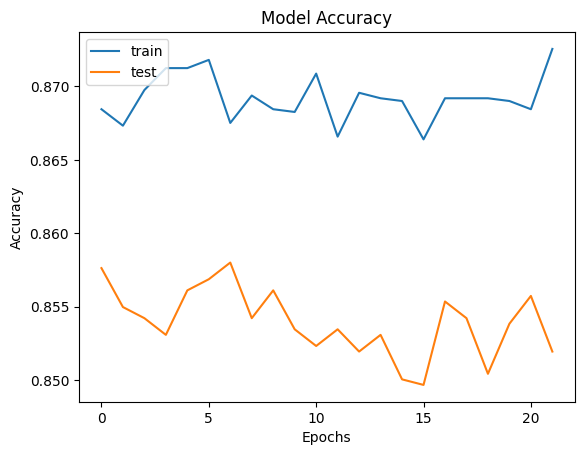

In [46]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

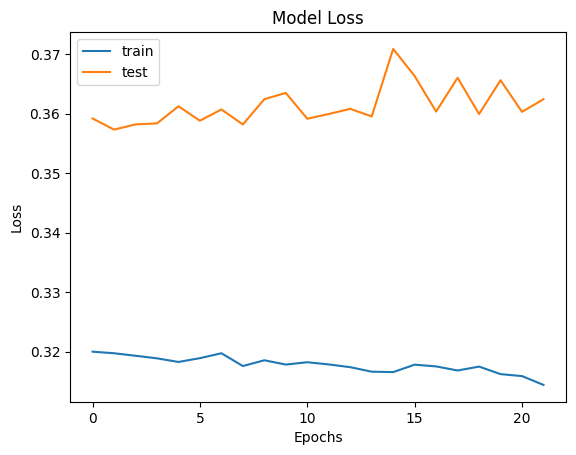

In [48]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [49]:
# Making predictions

y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 3ms/step


In [50]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[1525,   70],
       [ 217,  188]])

In [51]:
# Calculating the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.8565

In [52]:
# getting the weights
classifier.get_weights()

[array([[ 1.13991566e-01, -1.35392115e-01,  2.58662373e-01,
         -3.86534095e-01, -4.77364436e-02, -1.74850270e-01,
          1.35893822e-01, -1.57603286e-02, -7.17163980e-01,
          1.08612157e-01, -1.48365557e-01],
        [-8.78548861e-01,  2.10030645e-01,  5.28188348e-01,
         -4.34878677e-01, -4.47514325e-01,  4.33883905e-01,
         -5.40748835e-01, -1.15925550e-01,  6.42968893e-01,
         -1.14367642e-01,  2.04470620e-01],
        [-4.09437955e-04,  1.53248295e-01,  6.63085654e-02,
          3.83598417e-01, -2.20576838e-01,  1.08654857e-01,
          6.85915276e-02,  9.03273653e-03,  1.82168242e-02,
         -9.36503559e-02,  3.55427295e-01],
        [-8.93794894e-02, -2.42269158e-01, -7.48518229e-01,
         -3.04031223e-01, -4.76428866e-01, -3.43730390e-01,
         -3.23116034e-01, -7.42359996e-01, -1.31696910e-01,
         -4.21299547e-01,  4.01355833e-01],
        [-2.95454293e-01, -1.29878187e+00, -2.42283851e-01,
         -3.08389187e-01, -3.11019242e-01,  